## Clustering for Iris DataSet

## 1. Import Necessary Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import warnings
warnings.filterwarnings('ignore')

## 2. Loading Data

In [7]:
iris_data=sns.load_dataset('iris')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3. Initial Analysis

In [8]:
iris_data.shape

(150, 5)

In [9]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data Pre-Processing

In [25]:
min_max_scalar=MinMaxScaler()
iris_data_scaled=min_max_scalar.fit_transform(iris_data.iloc[:,:-1])

## 5. Data Building using k-means

In [23]:
k_means=KMeans(n_clusters=3, max_iter=600, algorithm = 'auto',init="k-means++")

In [26]:
k_means.fit(iris_data_scaled)

KMeans(max_iter=600, n_clusters=3)

In [27]:
clusters=k_means.predict(iris_data_scaled)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


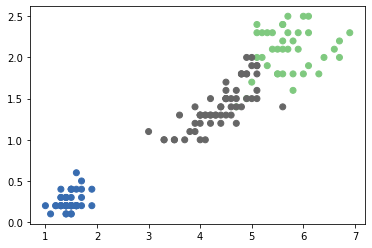

In [32]:
plt.scatter(iris_data.iloc[:,2], iris_data.iloc[:,3],c=clusters, cmap=plt.cm.Accent)
plt.show()

## 6. Finding Optimum numbers of clusters

### i. Using Elbow Method

In [35]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(iris_data_scaled)
    wcss.append(k_means.inertia_)

In [36]:
print(wcss)

[41.16611042137328, 12.12779075053819, 6.982216473785234, 5.516933472040375, 4.583940799311901, 3.923721004245269, 3.4746956485462017, 3.1430445051306166, 2.865882822863312, 2.5479386343350168]


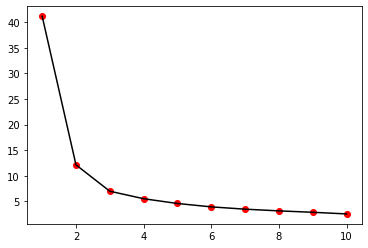

In [41]:
plt.plot(range(1,11),wcss, color='black')
plt.scatter(range(1,11),wcss, color='red')
plt.show()

### ii. Using Silhouette score

In [54]:
silhouette_score_values=[]
for i in range(2,11):
    k_means=KMeans(n_clusters=i)
    k_means_cluster=k_means.fit_predict(iris_data_scaled)
    silhouette_score_values.append(silhouette_score(iris_data_scaled,k_means_cluster))

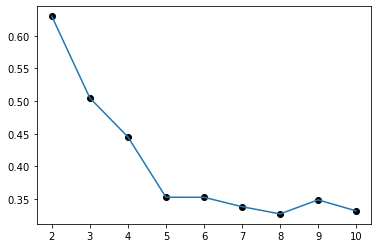

In [57]:
plt.plot(range(2,11), silhouette_score_values)
plt.scatter(range(2,11), silhouette_score_values, color='black')
plt.show()

### iii. Calinski Harabasz Score

In [59]:
c_h_score=[]
for i in range(2,11):
    k_means=KMeans(n_clusters=i)
    k_means_cluster=k_means.fit_predict(iris_data_scaled)
    c_h_score.append(calinski_harabasz_score(iris_data_scaled,k_means_cluster))

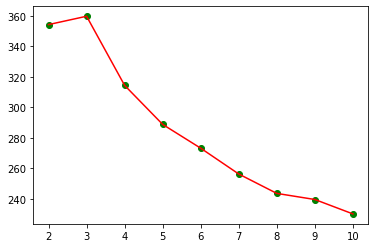

In [61]:
plt.plot(range(2,11), c_h_score, color='red')
plt.scatter(range(2,11), c_h_score, color='green')
plt.show()

## =============================================================================